In [1]:
!pip install ruptures

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from __future__ import division
import h5py
import ruptures as rpt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
anger_final = []
anticipation_final = []
disgust_final = []
fear_final = []
joy_final = []
sadness_final = []
surprise_final = []
trust_final = []

# Time Series Analysis for Delhi

In [4]:
model = load_model("/content/drive/MyDrive/Sem8/Model/ClassificationModel.h5")

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4800, 32)          4352      
_________________________________________________________________
dropout (Dropout)            (None, 4800, 32)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
Total params: 29,704
Trainable params: 29,704
Non-trainable params: 0
_________________________________________________________________


In [6]:
file_dir = "/content/drive/MyDrive/CommunityTweets/Embeddings/"
for i in range(61):
    file = "week" + str(i + 1) + "_embeddings.hdf5"
    f = h5py.File(file_dir+file, 'r') 
    data = f['vectors'][:]
    data = data.reshape(data.shape[0], data.shape[1], 1)
    anger = []
    anticipation = []
    disgust = []
    fear = []
    joy = []
    sadness = []
    surprise = []
    trust = []

    # data = f.get('vectors').value
    ypred = model.predict(data)

    for element in ypred:
      anger.append(element[0])
      anticipation.append(element[1])
      disgust.append(element[2])
      fear.append(element[3])
      joy.append(element[4])
      sadness.append(element[5])
      surprise.append(element[6])
      trust.append(element[7])

    if len(anger) > 0:
      anger_final.append(sum(anger)/len(anger))

    if len(anticipation) > 0:
      anticipation_final.append(sum(anticipation)/len(anticipation))

    if len(disgust) > 0:
      disgust_final.append(sum(disgust)/len(disgust))

    if len(fear) > 0:
      fear_final.append(sum(fear)/len(fear))

    if len(joy) > 0:
      joy_final.append(sum(joy)/len(joy))

    if len(sadness) > 0:
      sadness_final.append(sum(sadness)/len(sadness))

    if len(surprise) > 0:
      surprise_final.append(sum(surprise)/len(surprise))

    if len(trust) > 0:
      trust_final.append(sum(trust)/len(trust))


In [7]:
print(anger_final)
print(anticipation_final)
print(disgust_final)
print(fear_final)
print(joy_final)
print(sadness_final)
print(surprise_final)
print(trust_final)

[0.044649261082040856, 0.04841859113660218, 0.04741032948766993, 0.04927603704203303, 0.048828527815942845, 0.04656184627195445, 0.04937780297590879, 0.04777222926631296, 0.049028900319445345, 0.04903856219660108, 0.04937734686301084, 0.0450916743743591, 0.0467534562167914, 0.0499343107970201, 0.050900122949055264, 0.04978633005527164, 0.05027129725998677, 0.049295524735588674, 0.04882111334271969, 0.04941206442257217, 0.05004238326784591, 0.04862063906746781, 0.04932934009594473, 0.049999948863576095, 0.04926663607299209, 0.054225723645491206, 0.04993652226216343, 0.049158065015053654, 0.049752625644207, 0.04820052649310691, 0.053977429742094865, 0.04867969265142089, 0.046716194174332704, 0.04991728312266852, 0.04906344020366669, 0.047876502829368665, 0.04967001626189326, 0.04864841472648666, 0.05901596111059189, 0.050905975526224875, 0.04980172425508499, 0.04933317975107446, 0.05006550472974777, 0.0492996422346226, 0.04926066567199399, 0.04959544754458334, 0.049640609258150004, 0.049

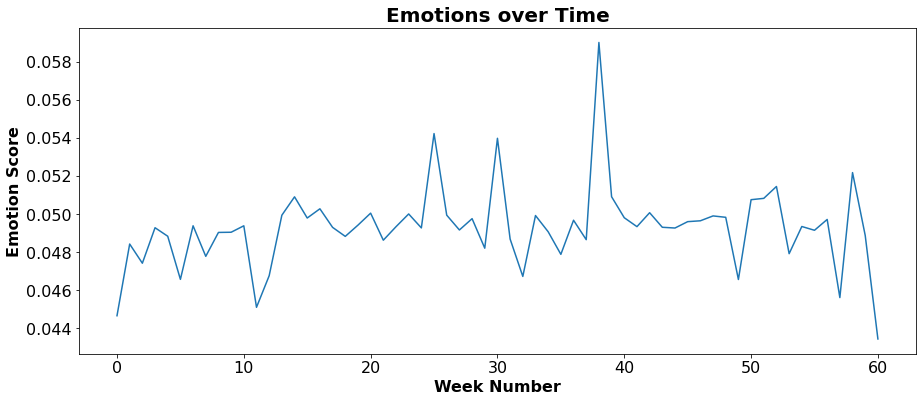

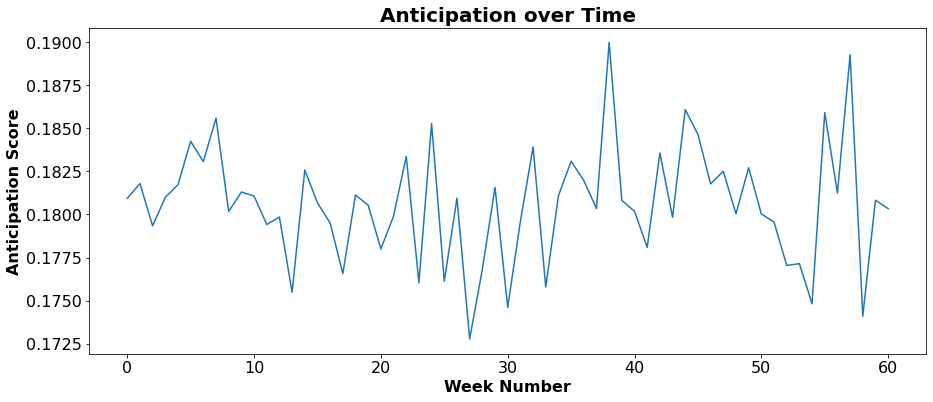

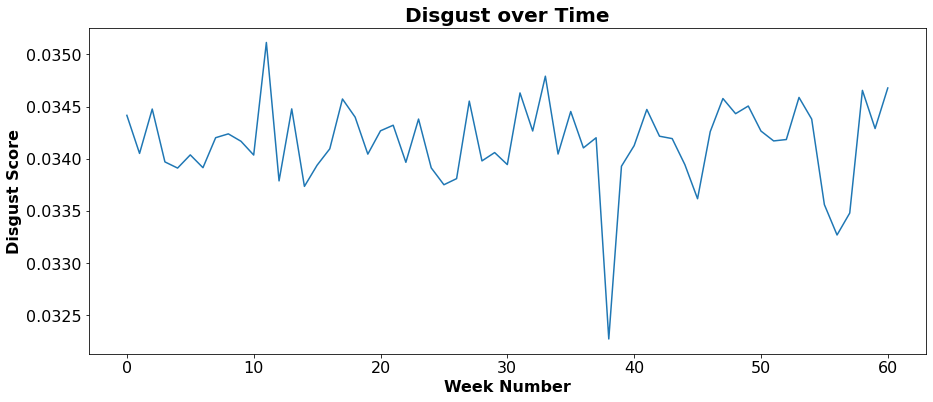

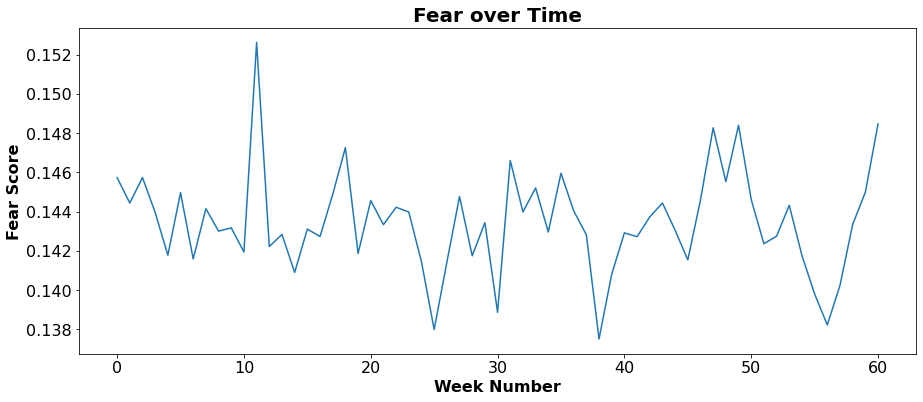

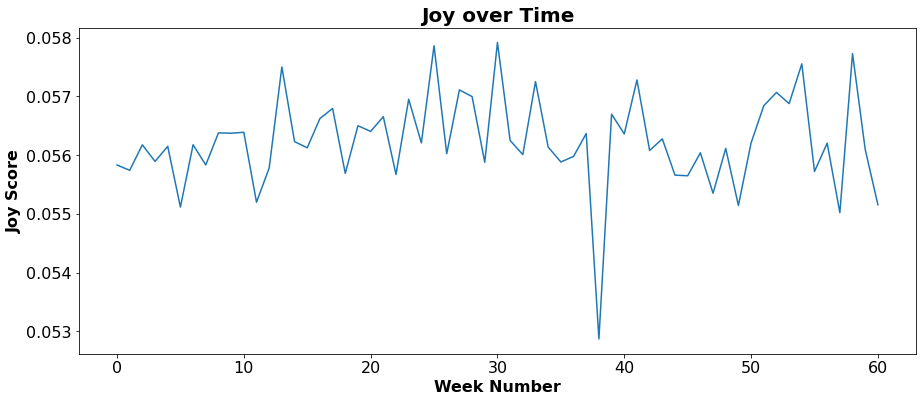

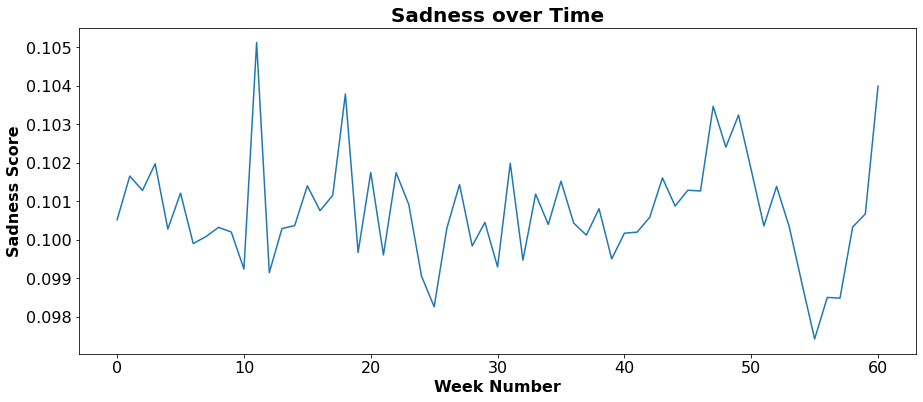

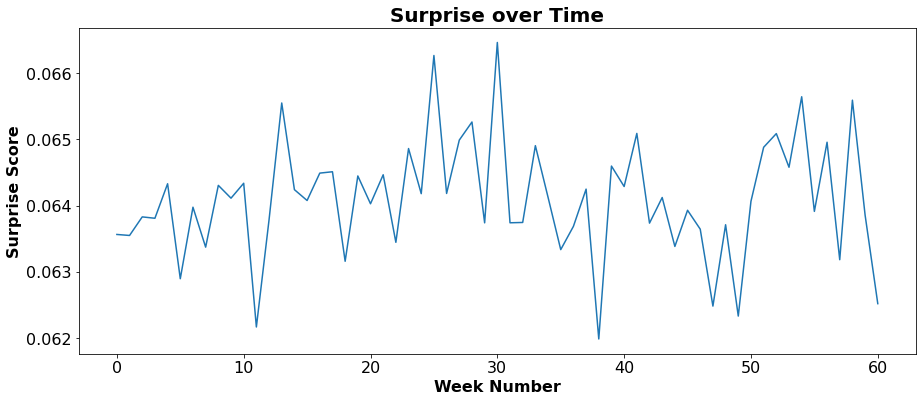

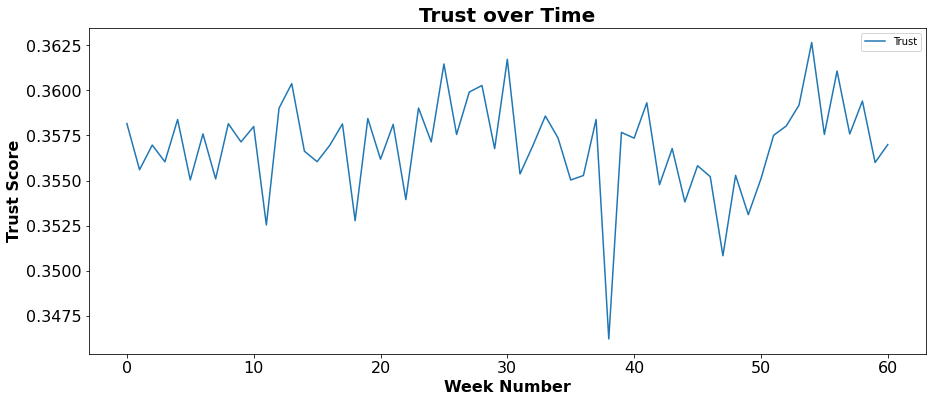

In [9]:
# data = [(1, 0.256), (2, 0.5), (3, 0.73), (4, 0.75), (5, 0.34), (6, 0.68), (7, 0.45), (8, 0.83), (9, 0.91), (10, 0.35), (11, 0.01), (12, 0.21), (13, 0.67), (14, 0.36), (15, 0.22)]
data = np.array(anger_final)
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(data, label='Anger')

ax.set_title('Emotions over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Week Number', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Emotion Score', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

data2 = np.array(anticipation_final)
fig2, ax2 = plt.subplots(figsize=(15, 6))
ax2.plot(data2, label='Anticipation')

ax2.set_title('Anticipation over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax2.set_xlabel('Week Number', fontsize = 16, fontdict=dict(weight='bold'))
ax2.set_ylabel('Anticipation Score', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

data3 = np.array(disgust_final)
fig3, ax3 = plt.subplots(figsize=(15, 6))
ax3.plot(data3, label='Disgust')

ax3.set_title('Disgust over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax3.set_xlabel('Week Number', fontsize = 16, fontdict=dict(weight='bold'))
ax3.set_ylabel('Disgust Score', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

data4 = np.array(fear_final)
fig4, ax4 = plt.subplots(figsize=(15, 6))
ax4.plot(data4, label='Fear')

ax4.set_title('Fear over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax4.set_xlabel('Week Number', fontsize = 16, fontdict=dict(weight='bold'))
ax4.set_ylabel('Fear Score', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

data5 = np.array(joy_final)
fig5, ax5 = plt.subplots(figsize=(15, 6))
ax5.plot(data5, label='Joy')

ax5.set_title('Joy over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax5.set_xlabel('Week Number', fontsize = 16, fontdict=dict(weight='bold'))
ax5.set_ylabel('Joy Score', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

data6 = np.array(sadness_final)
fig6, ax6 = plt.subplots(figsize=(15, 6))
ax6.plot(data6, label='Sadness')

ax6.set_title('Sadness over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax6.set_xlabel('Week Number', fontsize = 16, fontdict=dict(weight='bold'))
ax6.set_ylabel('Sadness Score', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

data7 = np.array(surprise_final)
fig7, ax7 = plt.subplots(figsize=(15, 6))
ax7.plot(data7, label='Surprise')

ax7.set_title('Surprise over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax7.set_xlabel('Week Number', fontsize = 16, fontdict=dict(weight='bold'))
ax7.set_ylabel('Surprise Score', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

data8 = np.array(trust_final)
fig8, ax8 = plt.subplots(figsize=(15, 6))
ax8.plot(data8, label='Trust')

ax8.set_title('Trust over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax8.set_xlabel('Week Number', fontsize = 16, fontdict=dict(weight='bold'))
ax8.set_ylabel('Trust Score', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend()
plt.show()

# Change Point Detection - Ruptures

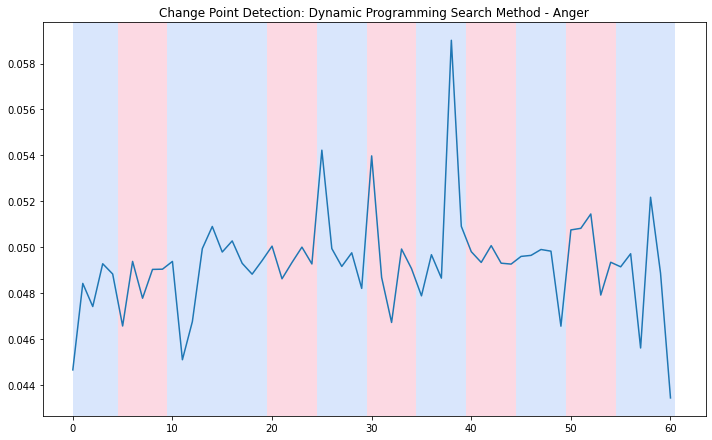

In [10]:
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(data)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(data, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method - Anger')
plt.show()

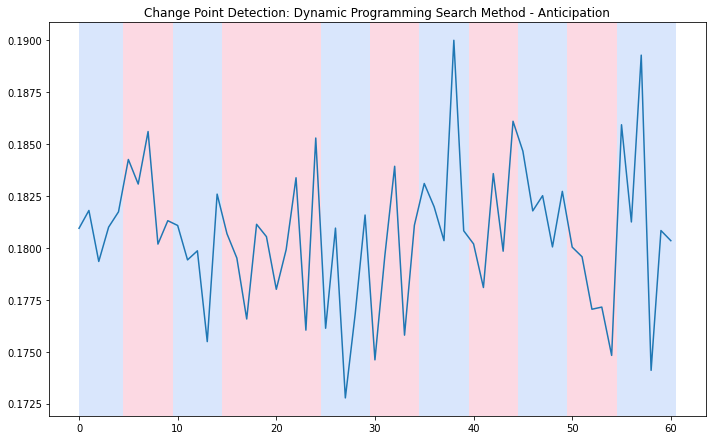

In [11]:
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(data2)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(data2, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method - Anticipation')
plt.show()

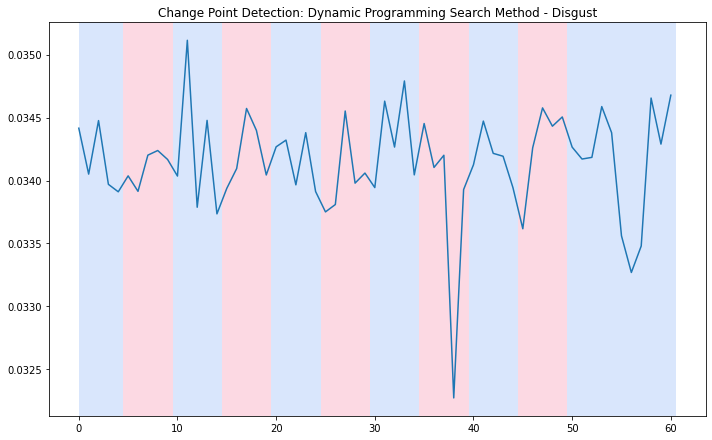

In [12]:
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(data3)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(data3, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method - Disgust')
plt.show()

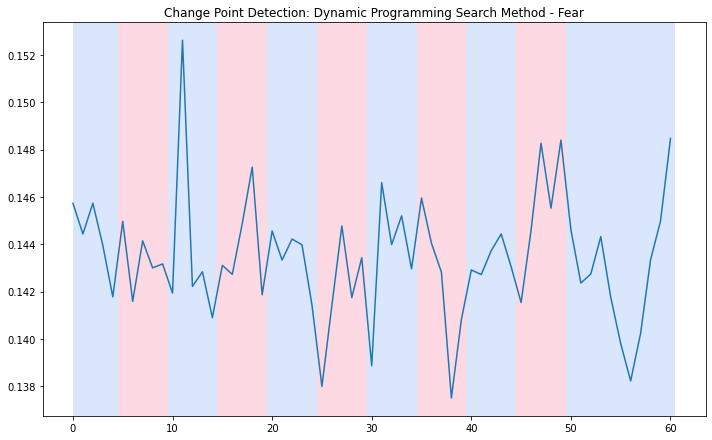

In [13]:
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(data4)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(data4, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method - Fear')
plt.show()

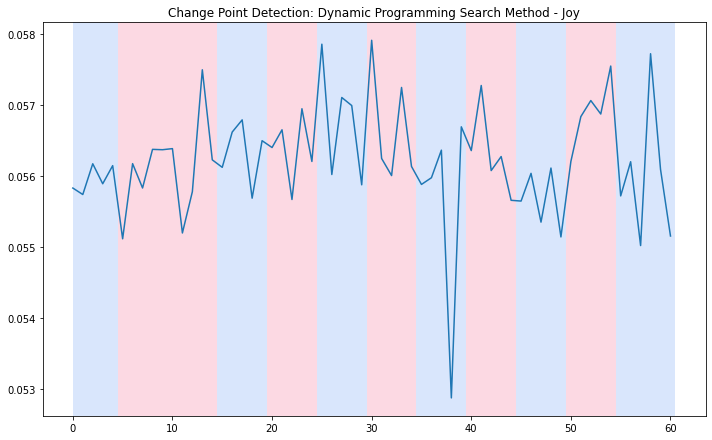

In [14]:
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(data5)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(data5, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method - Joy')
plt.show()

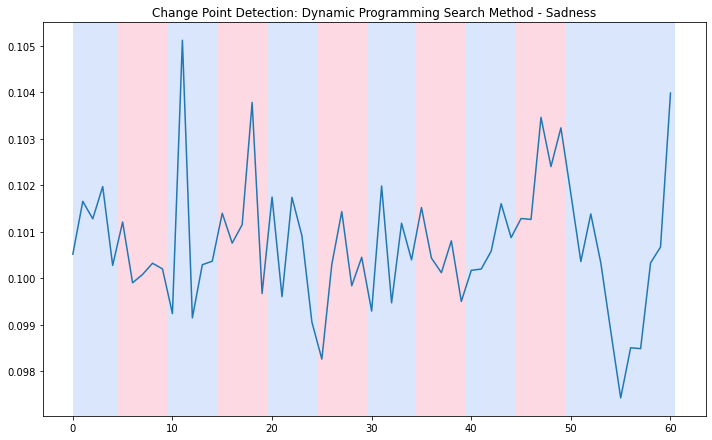

In [15]:
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(data6)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(data6, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method - Sadness')
plt.show()

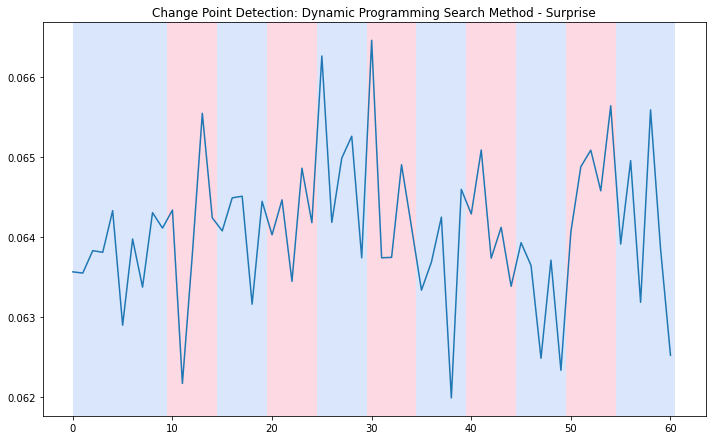

In [16]:
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(data7)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(data7, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method - Surprise')
plt.show()

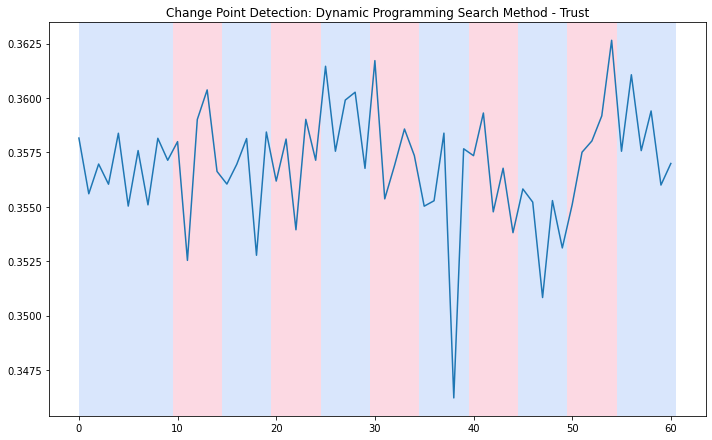

In [17]:
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(data8)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(data8, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method - Trust')
plt.show()